In [15]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import *
import numpy as np
import time
from LowLevelModules.LakeShore import LakeShore335
from pymeasure.instruments.keithley import Keithley2400
# keithley stuff
keithley = Keithley2400("GPIB0::24::INSTR")   # 'ASRL9::INSTR' if RS232 connection
keithley.apply_voltage()                # Sets up to source voltage
keithley.source_voltage_range = 5      # Sets the source voltage range to 1 V
keithley.compliance_current = 0.5      # Sets the compliance current to 1 mA
keithley.source_voltage = 0    
keithley.measure_current()              # Sets up to measure voltage

<IPython.core.display.Javascript object>


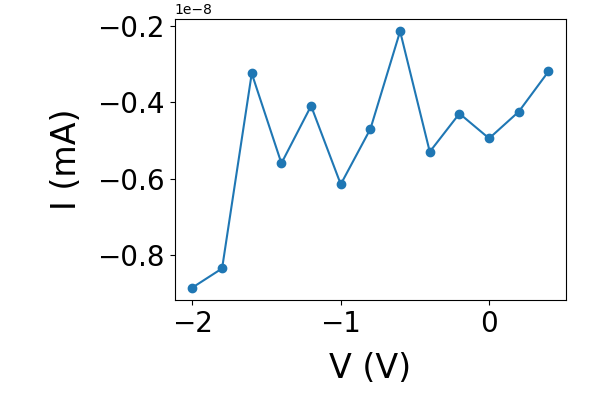

In [16]:
"""#######################################   USER INPUT   #################################################"""
save_data = True
Voltages = np.arange(-2, 2, .2)


"""#########################################################################################################"""

# initialize the rest
lp = LivePlot(1, 1, 6, 4, 'o', 'V (V)', 'I (mA)')
Curr, Volt = [], []
t_now = 0

keithley.enable_source()

for v in Voltages:
    try:
        keithley.ramp_to_voltage(v) 
        time.sleep(.5)

        Curr.append(keithley.current * 1000) 
        Volt.append(v)

        lp.plot_live(Volt, Curr)

    except KeyboardInterrupt:
        break

keithley.disable_source()               

plt.show()
if save_data:
    data_type = 'IVCurve'
    data_header = "Voltage (V)            Current (A)"
    data_array = np.array([Volt, Curr]).T
    data_save(data_array, lp.fig, data_type, data_header)
    

In [6]:
range(-2,2.1,.1)

TypeError: 'float' object cannot be interpreted as an integer